In [1]:
import pandas as pd
df = pd.read_csv('/Users/maheshratnakumar/Downloads/goibibo_flights_data.csv')

In [2]:
# Displaying the first few rows of the data
df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Unnamed: 11,Unnamed: 12
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,NaN,NaN
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,NaN,NaN
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,NaN,NaN
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,NaN,NaN
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,NaN,NaN


In [3]:
# Dropping Unnamed:11 and Unnamed:12 because all the values in the columns are null
df=df.dropna(axis=1)
df

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop
...,...,...,...,...,...,...,...,...,...,...,...
300256,13-08-2023,Vistara,UK-822,business,Chennai,09:45,Hyderabad,19:50,10h 05m,"70,304",1-stop
300257,13-08-2023,Vistara,UK-826,business,Chennai,12:30,Hyderabad,22:55,10h 25m,"78,262",1-stop
300258,13-08-2023,Vistara,UK-832,business,Chennai,07:05,Hyderabad,20:55,13h 50m,"80,285",1-stop
300259,13-08-2023,Vistara,UK-828,business,Chennai,07:00,Hyderabad,17:00,10h 00m,"82,809",1-stop


In [4]:
# Converting date columns into datetime formats
# df.loc[:, 'flight date'] = pd.to_datetime(df['flight date'], dayfirst=True)
# Convert 'flight date' to a datetime object
df['flight date'] = pd.to_datetime(df['flight date'], errors='coerce')


/var/folders/xk/8pm1qxvs4_xbqng6wfcs2q4c0000gn/T/ipykernel_91806/3675510915.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['flight date'] = pd.to_datetime(df['flight date'], errors='coerce')


In [5]:
# Extracting meaningful features such as day, month, and year.
# df.loc[:, 'day'] = df['flight date'].dt.day
# df.loc[:, 'month'] = df['flight date'].dt.month
# df.loc[:, 'year'] = df['flight date'].dt.year
# Now extract the day, month, and year
df['day'] = df['flight date'].dt.day
df['month'] = df['flight date'].dt.month
df['year'] = df['flight date'].dt.year
df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,day,month,year
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,26,6,2023
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,26,6,2023
2,2023-06-26,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,26,6,2023
3,2023-06-26,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,26,6,2023
4,2023-06-26,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,26,6,2023


In [6]:
# Transforming categorical variables (like airline, from, to, and stops) into numerical representations for model compatibility.
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_columns = ['airline', 'from', 'to']
label_encoders = {}

# Applying Label Encoding to each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Displaying the transformed DataFrame
df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,day,month,year
0,2023-06-26,4,SG-8709,economy,2,18:55,5,21:05,02h 10m,"6,013",non-stop,26,6,2023
1,2023-06-26,4,SG-8157,economy,2,06:20,5,08:40,02h 20m,"6,013",non-stop,26,6,2023
2,2023-06-26,1,I5-764,economy,2,04:25,5,06:35,02h 10m,"6,016",non-stop,26,6,2023
3,2023-06-26,7,UK-995,economy,2,10:20,5,12:35,02h 15m,"6,015",non-stop,26,6,2023
4,2023-06-26,7,UK-963,economy,2,08:50,5,11:10,02h 20m,"6,015",non-stop,26,6,2023


In [7]:
# Display the encoding for each categorical column
for col, le in label_encoders.items():
    print(f"Encoding for '{col}':")
    for idx, category in enumerate(le.classes_):
        print(f"  {category} -> {idx}")


Encoding for 'airline':
  Air India -> 0
  AirAsia -> 1
  GO FIRST -> 2
  Indigo -> 3
  SpiceJet -> 4
  StarAir -> 5
  Trujet -> 6
  Vistara -> 7
Encoding for 'from':
  Bangalore -> 0
  Chennai -> 1
  Delhi -> 2
  Hyderabad -> 3
  Kolkata -> 4
  Mumbai -> 5
Encoding for 'to':
  Bangalore -> 0
  Chennai -> 1
  Delhi -> 2
  Hyderabad -> 3
  Kolkata -> 4
  Mumbai -> 5


In [8]:
def clean_stops(x):
    if 'non-stop' in x:
        return 0
    elif '1-' in x:
        return 1
    elif '2' in x:
        return 2
    elif '3' in x:
        return 3
    elif '4' in x:
        return 4
    elif '5' in x:
        return 5
    elif '6' in x:
        return 6

df['stops']=df['stops'].apply(lambda s:clean_stops(s))

# Changed the encoding for stops col using a function

In [9]:
# Converting duration from text format to numerical values in minutes.

# Function to convert duration from 'xh ym' format to minutes
def convert_duration_to_minutes(duration):
    # Initialize total minutes
    total_minutes = 0
    # Split the duration into hours and minutes parts
    parts = duration.split()

    for part in parts:
        try:
            if 'h' in part:
                total_minutes += int(float(part.replace('h', ''))) * 60
            elif 'm' in part:
                total_minutes += int(float(part.replace('m', '')))
        except ValueError:
            continue

    return total_minutes

# Apply the function to convert 'duration' to minutes
df['duration'] = df['duration'].apply(convert_duration_to_minutes)

# Display the updated DataFrame
df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,day,month,year
0,2023-06-26,4,SG-8709,economy,2,18:55,5,21:05,130,"6,013",0,26,6,2023
1,2023-06-26,4,SG-8157,economy,2,06:20,5,08:40,140,"6,013",0,26,6,2023
2,2023-06-26,1,I5-764,economy,2,04:25,5,06:35,130,"6,016",0,26,6,2023
3,2023-06-26,7,UK-995,economy,2,10:20,5,12:35,135,"6,015",0,26,6,2023
4,2023-06-26,7,UK-963,economy,2,08:50,5,11:10,140,"6,015",0,26,6,2023


In [10]:
# Cleaning and converting the price column from text format to a numerical format.

# Function to clean and convert the price column to a numerical format
def convert_price_to_numerical(price):
    return float(price.replace(',', ''))

# Apply the function to the 'price' column
df['price'] = df['price'].apply(convert_price_to_numerical)

# Display the updated DataFrame
df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,day,month,year
0,2023-06-26,4,SG-8709,economy,2,18:55,5,21:05,130,6013.0,0,26,6,2023
1,2023-06-26,4,SG-8157,economy,2,06:20,5,08:40,140,6013.0,0,26,6,2023
2,2023-06-26,1,I5-764,economy,2,04:25,5,06:35,130,6016.0,0,26,6,2023
3,2023-06-26,7,UK-995,economy,2,10:20,5,12:35,135,6015.0,0,26,6,2023
4,2023-06-26,7,UK-963,economy,2,08:50,5,11:10,140,6015.0,0,26,6,2023


In [11]:
# Checking for null values
df.isnull().sum()
# No null values

flight date    0
airline        0
flight_num     0
class          0
from           0
dep_time       0
to             0
arr_time       0
duration       0
price          0
stops          0
day            0
month          0
year           0
dtype: int64

In [12]:
# Checking Data Types
df.dtypes

flight date    datetime64[ns]
airline                 int64
flight_num             object
class                  object
from                    int64
dep_time               object
to                      int64
arr_time               object
duration                int64
price                 float64
stops                   int64
day                     int32
month                   int32
year                    int32
dtype: object

In [13]:
# Remove Duplicates
# Identify Duplicates:
print(df.duplicated().sum())
# Drop Duplicates:
df = df.drop_duplicates()
print(df.duplicated().sum())

2
0


## Exploratory Data Analysis (EDA)

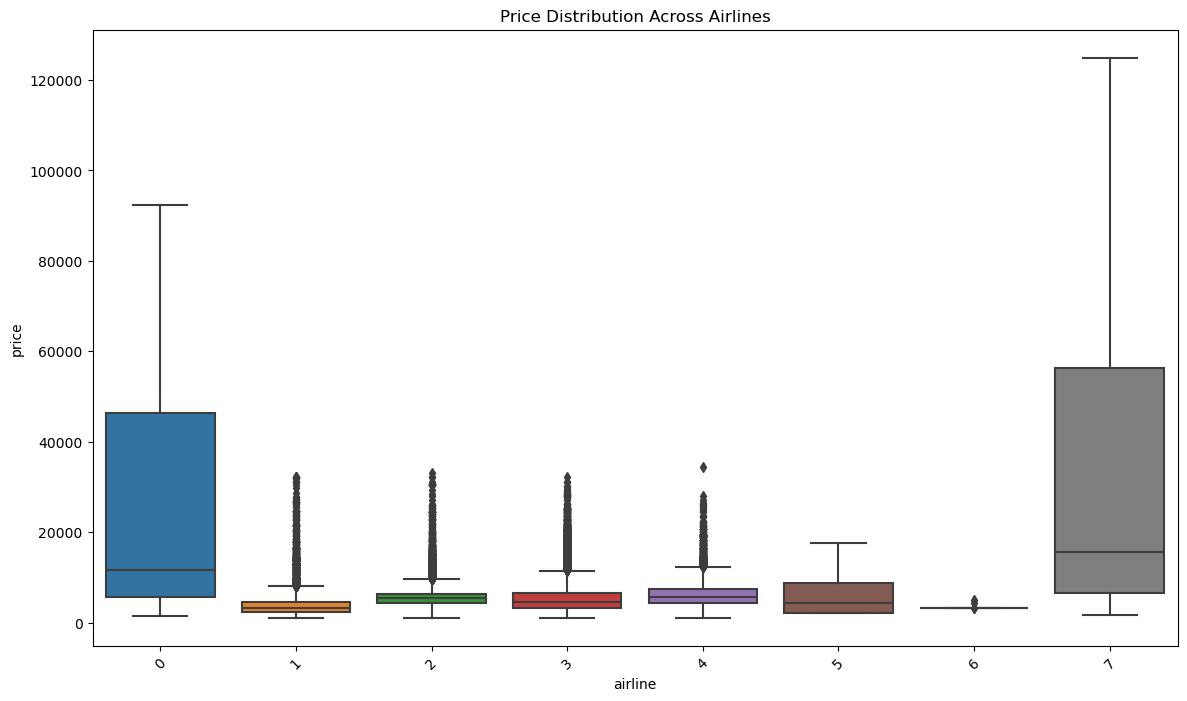

In [15]:
# Analyze the distribution of prices across different airlines, routes, and travel times.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.boxplot(x='airline', y='price', data=df)
plt.title('Price Distribution Across Airlines')
plt.xticks(rotation=45)
plt.show()

/var/folders/xk/8pm1qxvs4_xbqng6wfcs2q4c0000gn/T/ipykernel_91806/1585818241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['from'] = label_encoders['from'].inverse_transform(df['from'])
/var/folders/xk/8pm1qxvs4_xbqng6wfcs2q4c0000gn/T/ipykernel_91806/1585818241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['to'] = label_encoders['to'].inverse_transform(df['to'])
/var/folders/xk/8pm1qxvs4_xbqng6wfcs2q4c0000gn/T/ipykernel_91806/1585818241.py:7: SettingWithCopyWarning: 
A value is trying to be

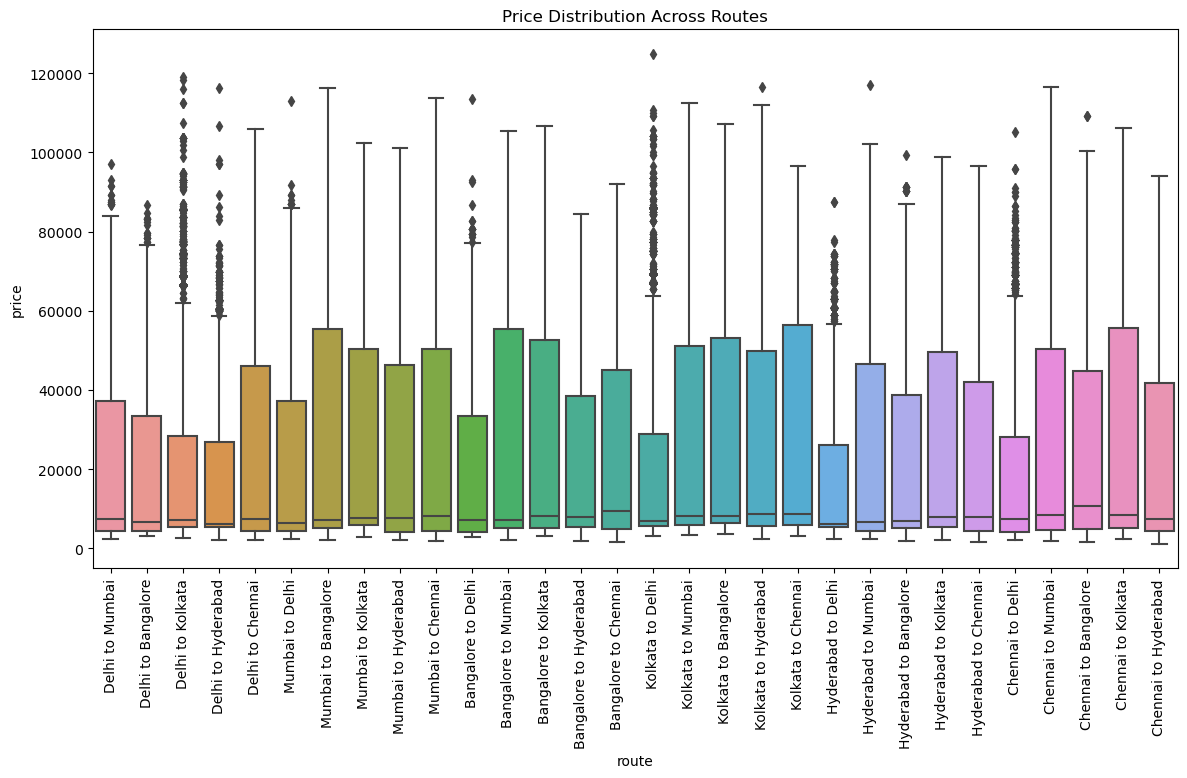

In [16]:
# Distribution of Prices by Route
# Using the label encoders stored for 'from' and 'to' columns to get the original city names
df['from'] = label_encoders['from'].inverse_transform(df['from'])
df['to'] = label_encoders['to'].inverse_transform(df['to'])

# Creating the 'route' column with city names
df['route'] = df['from'] + ' to ' + df['to']

# Plotting the distribution of prices by route
plt.figure(figsize=(14, 7))
sns.boxplot(x='route', y='price', data=df)
plt.title('Price Distribution Across Routes')
plt.xticks(rotation=90)
plt.show()

In [17]:
# Re-encoding the 'from' and 'to' columns using the original label encoders
df['from'] = label_encoders['from'].fit_transform(df['from'])
df['to'] = label_encoders['to'].fit_transform(df['to'])

# Display the updated DataFrame to confirm the re-encoding
df.head()

/var/folders/xk/8pm1qxvs4_xbqng6wfcs2q4c0000gn/T/ipykernel_91806/4133304345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['from'] = label_encoders['from'].fit_transform(df['from'])
/var/folders/xk/8pm1qxvs4_xbqng6wfcs2q4c0000gn/T/ipykernel_91806/4133304345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['to'] = label_encoders['to'].fit_transform(df['to'])


,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,day,month,year,route
0,2023-06-26,4,SG-8709,economy,2,18:55,5,21:05,130,6013.0,0,26,6,2023,Delhi to Mumbai
1,2023-06-26,4,SG-8157,economy,2,06:20,5,08:40,140,6013.0,0,26,6,2023,Delhi to Mumbai
2,2023-06-26,1,I5-764,economy,2,04:25,5,06:35,130,6016.0,0,26,6,2023,Delhi to Mumbai
3,2023-06-26,7,UK-995,economy,2,10:20,5,12:35,135,6015.0,0,26,6,2023,Delhi to Mumbai
4,2023-06-26,7,UK-963,economy,2,08:50,5,11:10,140,6015.0,0,26,6,2023,Delhi to Mumbai


/var/folders/xk/8pm1qxvs4_xbqng6wfcs2q4c0000gn/T/ipykernel_91806/3205279071.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['departure_hour'] = pd.to_datetime(df['dep_time'], format='%H:%M').dt.hour
/var/folders/xk/8pm1qxvs4_xbqng6wfcs2q4c0000gn/T/ipykernel_91806/3205279071.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_of_day'] = df['departure_hour'].apply(get_time_of_day)


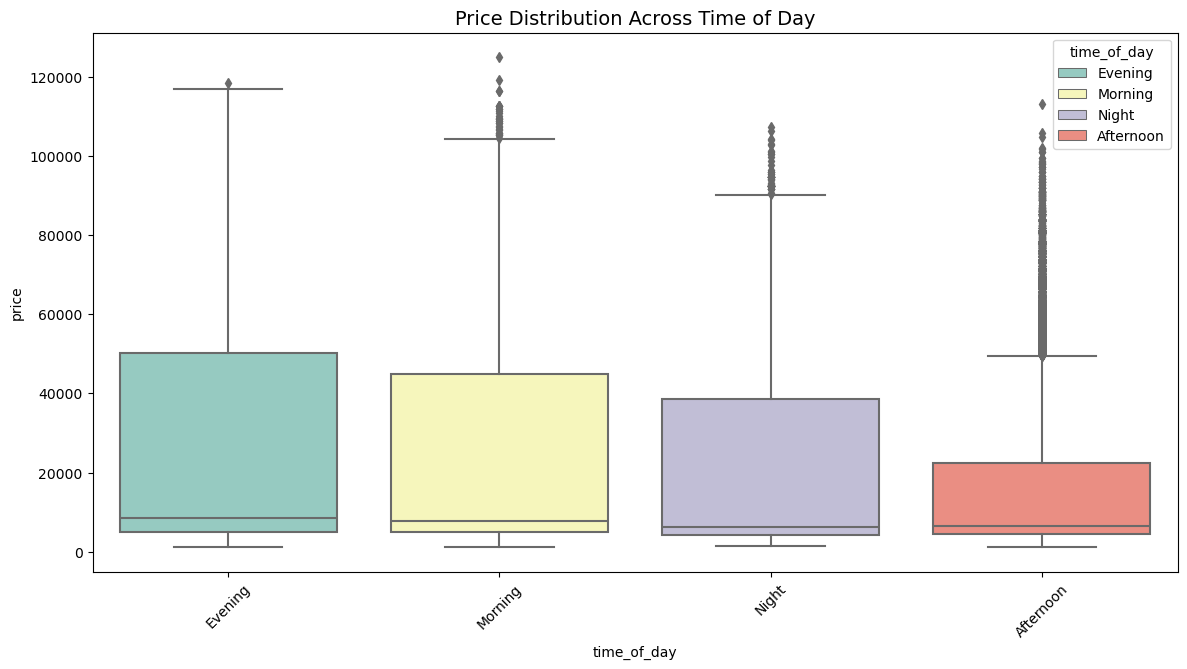

In [18]:
# Distribution of Prices by Travel Time
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['departure_hour'] = pd.to_datetime(df['dep_time'], format='%H:%M').dt.hour
df['time_of_day'] = df['departure_hour'].apply(get_time_of_day)

# Plotting
plt.figure(figsize=(14, 7))
sns.boxplot(x='time_of_day', y='price', data=df, hue='time_of_day', palette='Set3', dodge=False)
plt.title('Price Distribution Across Time of Day', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [19]:
# Evening Prices: Prices during the evening are generally higher but tend to be more consistent, with few or no outliers,
# indicating a reliable pricing pattern.

# Morning Prices: While morning flights are priced slightly lower than evening flights,
# there are a few notable outliers that increase the overall price variability.

# Night Prices: Night flight prices are generally lower than both morning and evening flights.
# However, the presence of outliers is significant, and these high-price outliers are comparable to the extreme outliers observed in the morning.

# Afternoon Prices: Afternoon flights have the lowest average prices but show the most variability, with a significant number of outliers.
# These outliers represent the highest deviations from the average, making afternoon prices the most unpredictable.

In [20]:
# Summary Statistics
price_summary_by_airline = df.groupby('airline')['price'].describe()
price_summary_by_route = df.groupby('route')['price'].describe()
price_summary_by_time = df.groupby('time_of_day')['price'].describe()

print("Price Summary by Airline:")
print(price_summary_by_airline)

print("\nPrice Summary by Route:")
print(price_summary_by_route)

print("\nPrice Summary by Time of Day:")
print(price_summary_by_time)

Price Summary by Airline:
            count          mean           std     min     25%      50%  \
airline                                                                  
0         80892.0  23837.936075  21233.238459  1541.0  5679.0  11635.0   
1         16098.0   4132.026525   2852.287315  1116.0  2385.0   3309.0   
2         23177.0   5708.459464   2538.821478  1116.0  4247.0   5389.0   
3         43120.0   5377.492092   3301.585273  1116.0  3251.0   4498.0   
4          9011.0   6241.051826   3029.649677  1117.0  4239.0   5711.0   
5            61.0   4982.016393   3522.862555  2020.0  2136.0   4380.0   
6            41.0   3277.097561    308.171203  3155.0  3198.0   3228.0   
7        127859.0  30831.962756  26038.299957  1731.0  6476.0  15698.0   

             75%       max  
airline                     
0        46378.0   92335.0  
1         4635.0   32236.0  
2         6387.0   33131.0  
3         6554.0   32272.0  
4         7486.0   34500.0  
5         8668.0   17657.0  
6

In [21]:
#  Decode Airline Names and Route Names for analysis
 # Use the inverse_transform method of the LabelEncoder to get the original airline names

# Decode the airline column in the DataFrame
df['airline'] = label_encoders['airline'].inverse_transform(df['airline'])

/var/folders/xk/8pm1qxvs4_xbqng6wfcs2q4c0000gn/T/ipykernel_91806/1017584721.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airline'] = label_encoders['airline'].inverse_transform(df['airline'])


In [22]:
# Extract the hour and create the 'time_of_day' column
df['departure_hour'] = pd.to_datetime(df['dep_time'], format='%H:%M').dt.hour
df['time_of_day'] = df['departure_hour'].apply(get_time_of_day)

# Re-run the analysis to calculate average prices
average_price_by_airline = df.groupby('airline')['price'].mean().sort_values(ascending=False)
average_price_by_route = df.groupby('route')['price'].mean().sort_values(ascending=False)
average_price_by_time_of_day = df.groupby('time_of_day')['price'].mean().sort_values(ascending=False)

# Display the analysis results
average_price_by_airline, average_price_by_route, average_price_by_time_of_day

/var/folders/xk/8pm1qxvs4_xbqng6wfcs2q4c0000gn/T/ipykernel_91806/3136706349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['departure_hour'] = pd.to_datetime(df['dep_time'], format='%H:%M').dt.hour
/var/folders/xk/8pm1qxvs4_xbqng6wfcs2q4c0000gn/T/ipykernel_91806/3136706349.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_of_day'] = df['departure_hour'].apply(get_time_of_day)


(airline
 Vistara      30831.962756
 Air India    23837.936075
 SpiceJet      6241.051826
 GO FIRST      5708.459464
 Indigo        5377.492092
 StarAir       4982.016393
 AirAsia       4132.026525
 Trujet        3277.097561
 Name: price, dtype: float64,
 route
 Chennai to Bangalore      25436.195441
 Kolkata to Chennai        23988.229821
 Bangalore to Kolkata      23825.431449
 Bangalore to Chennai      23648.828861
 Mumbai to Bangalore       23473.386341
 Bangalore to Mumbai       23452.636708
 Mumbai to Chennai         23102.099013
 Chennai to Mumbai         23085.325230
 Kolkata to Bangalore      23059.838355
 Chennai to Kolkata        22983.775168
 Mumbai to Kolkata         22689.637518
 Kolkata to Mumbai         22383.946368
 Hyderabad to Chennai      22156.218765
 Chennai to Hyderabad      21895.662297
 Kolkata to Hyderabad      21796.215778
 Hyderabad to Bangalore    21544.212206
 Bangalore to Hyderabad    21448.221380
 Mumbai to Hyderabad       21287.736184
 Hyderabad to Kolk

### Analysis and Insights

1. **Airlines with the Most Expensive and Cheapest Average Prices**:
   - The airline with the **highest average price** is **Vistara**, with an average price of approximately **30,832**.
   - The airline with the **lowest average price** is **Trujet**, with an average price of around **3,277**.

2. **Routes with the Most Expensive Average Prices**:
   - The **most expensive route** is **"Chennai to Bangalore"**, with an average price of **25,436**.

3. **Price Variations Based on Time of Day**:
   - **Evening** flights have the **highest average price**, suggesting greater demand or a preference for evening travel. Despite the higher prices, these flights show more stable pricing patterns, with fewer outliers.
   - **Morning** flights are the second most expensive, with some variability, indicating occasional price spikes, possibly due to business travelers or early morning demand.
   - **Night** flights are generally more affordable but display significant variability, with outliers that reach prices comparable to morning flights. These could be driven by red-eye flight options or limited availability.
   - **Afternoon** flights have the **lowest average prices** but the most outliers, reflecting a high degree of price fluctuation, perhaps due to fewer travelers or a mix of short- and long-haul flights.


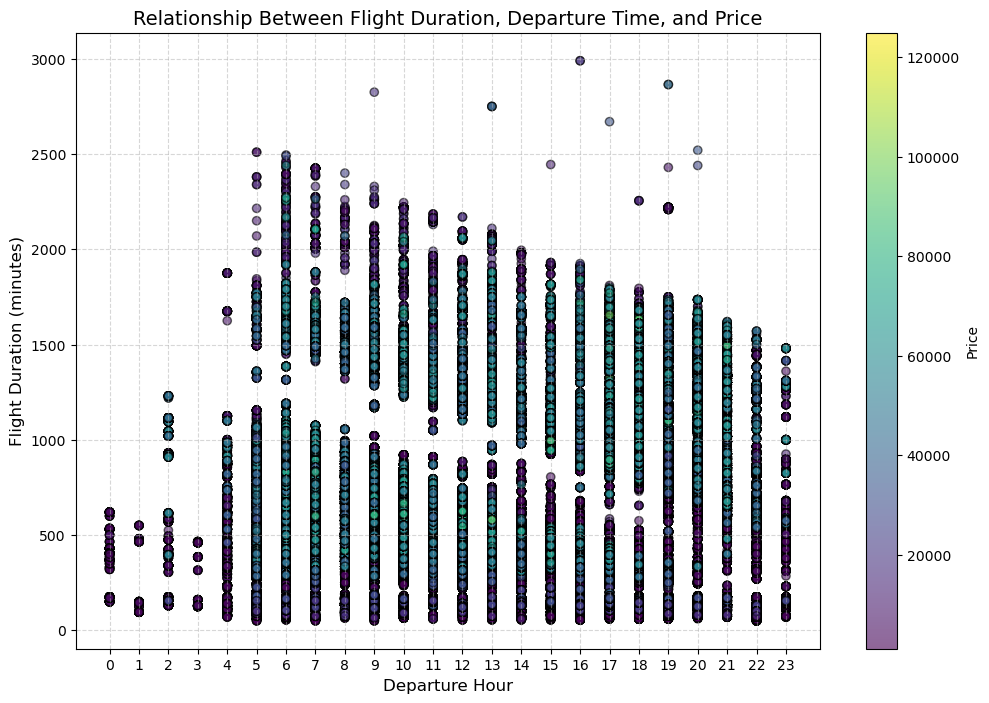

In [24]:
# Visualizing the relationship between flight duration, departure time, and price.

# Scatter plot to visualize the relationship between flight duration, departure time, and price
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=df['departure_hour'],
    y=df['duration'],
    c=df['price'],
    cmap='viridis',
    alpha=0.6,
    edgecolor='k')

# Adding labels and color bar
plt.colorbar(scatter, label='Price')
plt.xlabel('Departure Hour', fontsize=12)
plt.ylabel('Flight Duration (minutes)', fontsize=12)
plt.title('Relationship Between Flight Duration, Departure Time, and Price', fontsize=14)
plt.xticks(range(0, 24))  # Set x-ticks for each hour
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

In [25]:
# Observations
# The frequency of departures gradually increases from 12:00 AM (midnight) and peaks around 6:00 AM.
# After 6:00 AM, the number of departures decreases steadily throughout the day.

# Longer flights are generally more expensive, which is expected.
# However, there are cases where short flights are priced unusually high, potentially due to limited competition, last-minute bookings, or premium service options.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


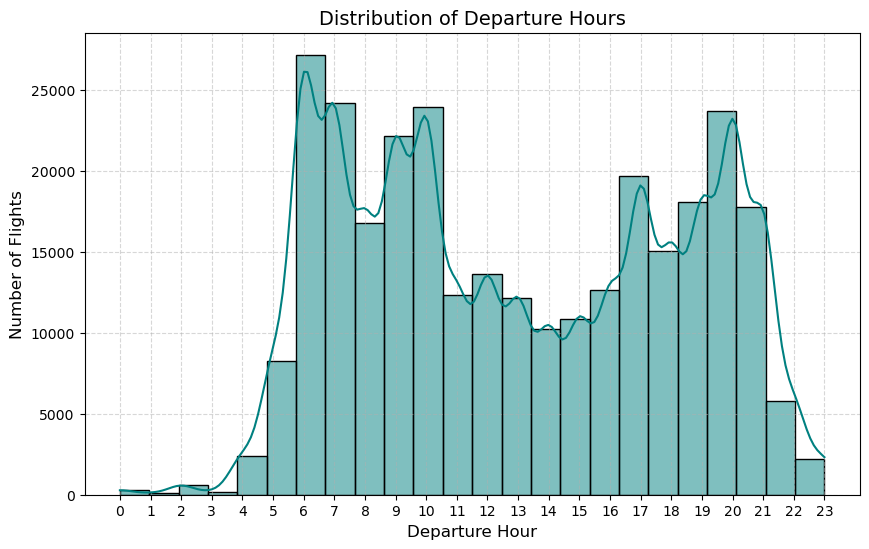

In [26]:
# Visualize the distribution of departure hours to identify peak times
plt.figure(figsize=(10, 6))
sns.histplot(df['departure_hour'], bins=24, kde=True, color='teal')
plt.title('Distribution of Departure Hours', fontsize=14)
plt.xlabel('Departure Hour', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.xticks(range(0, 24))  # Set x-ticks for each hour of the day
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

In [27]:
# Peak hours:-
# The histogram shows the distribution of flight departures throughout the day.
# There is a clear peak in departures during the early morning hours (around 5 AM to 7 AM), indicating a high volume of flights during this time.
# Off-Peak Hours:
# Departure activity is significantly lower during late night hours (10 PM to 4 AM),
# suggesting that these times are less preferred for travel or have fewer available flights.

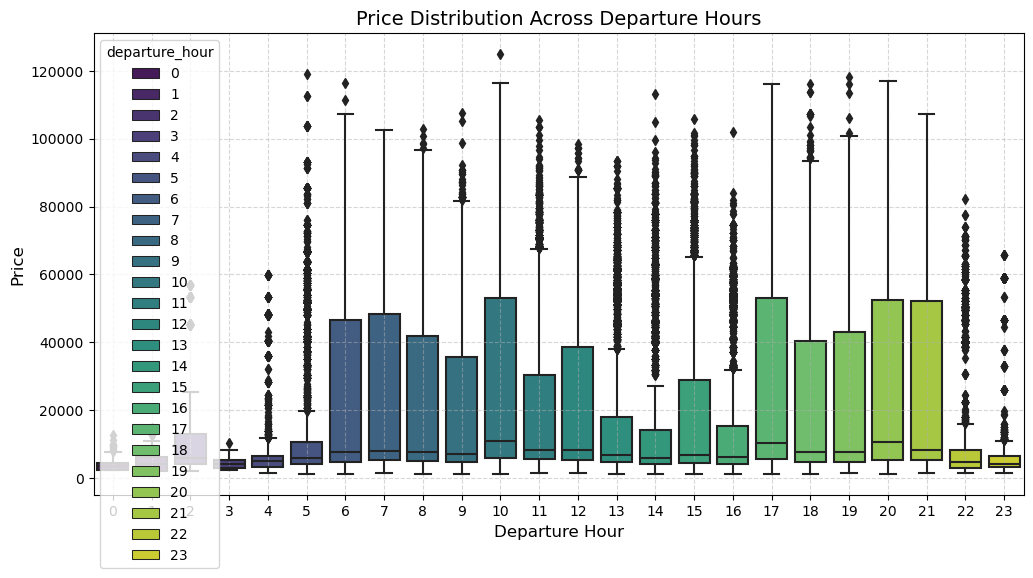

In [28]:
# Visualizing the relationship between departure time and price using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='departure_hour', y='price', data=df, hue='departure_hour', palette='viridis', dodge=False)
plt.title('Price Distribution Across Departure Hours', fontsize=14)
plt.xlabel('Departure Hour', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

In [29]:
# Peak and Off-Peak Pricing:
# Early Morning (5 AM - 8 AM): Prices tend to be higher with a wide range of variability.
# This could be due to the high demand from business travelers or limited flight availability.
# Midday to Early Afternoon (10 AM - 4 PM): Flight prices are generally lower and more stable, indicating lower demand during these hours.
# Evening (5 PM - 9 PM): Prices increase again, with significant variability, likely driven by commuter and leisure travelers.
# Night (10 PM - 4 AM): Lower average prices compared to peak hours like early morning and evening.
# This is likely due to reduced demand, as most travelers prefer not to fly during late-night hours.

/var/folders/xk/8pm1qxvs4_xbqng6wfcs2q4c0000gn/T/ipykernel_91806/266619013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stops'] = df['stops'].map({


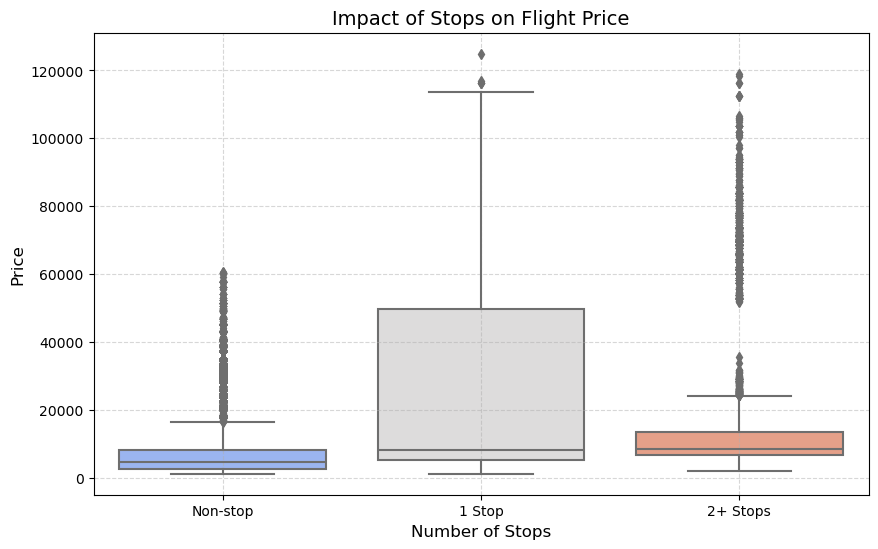

In [30]:
# Examining the impact of stops on the flight price.
# Converting numeric values to more descriptive categories
df['stops'] = df['stops'].map({
    0: 'Non-stop',
    1: '1 Stop',
    2: '2+ Stops'
}).fillna('Unknown')

# Box plot to examine the impact of the number of stops on flight price
plt.figure(figsize=(10, 6))
sns.boxplot(x='stops', y='price', data=df, hue='stops', palette='coolwarm', dodge=False)
plt.title('Impact of Stops on Flight Price', fontsize=14)
plt.xlabel('Number of Stops', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend([], [], frameon=False)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

In [31]:
# Non-Stop Flights: Generally the least expensive, but there are significant outliers.
# These outliers likely represent higher prices for longer distances.

# 1-Stop Flights: Tend to have the highest average prices with minimal outliers, indicating that these flights are costly regardless of distance.

# 2+ Stops: Priced lower on average than 1-stop flights but show the most outliers,
# suggesting that long-distance routes with multiple stops are more variable and generally expensive due to refueling and extended travel distances.

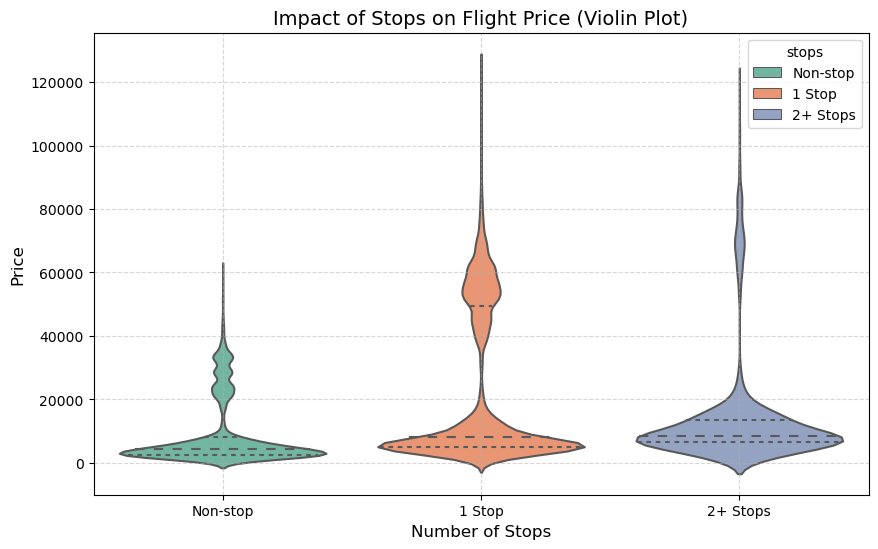

In [32]:
# Using a Violin Plot for a colorful and insightful visualization of the impact of stops on flight price
plt.figure(figsize=(10, 6))
sns.violinplot(x='stops', y='price', data=df, hue='stops', palette='Set2', dodge=False, inner='quartile')
plt.title('Impact of Stops on Flight Price (Violin Plot)', fontsize=14)
plt.xlabel('Number of Stops', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

/var/folders/xk/8pm1qxvs4_xbqng6wfcs2q4c0000gn/T/ipykernel_91806/785645703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stops'] = df['stops'].map(stops_mapping)


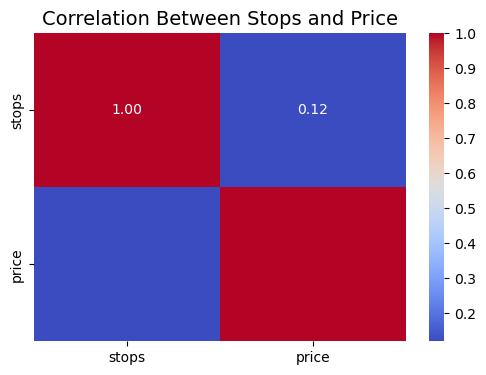

In [33]:
# Mapping the 'stops' column to numerical values
stops_mapping = {'Non-stop': 0, '1 Stop': 1, '2+ Stops': 2}
df['stops'] = df['stops'].map(stops_mapping)

# Calculate the correlation matrix
correlation_matrix = df[['stops', 'price']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Stops and Price', fontsize=14)
plt.show()

## Model Selection and Training

In [35]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns and drop unnecessary ones

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode object-type columns
df['airline'] = label_encoder.fit_transform(df['airline'])
df['class'] = label_encoder.fit_transform(df['class'])
df['time_of_day'] = label_encoder.fit_transform(df['time_of_day'])

# Drop columns that are not useful or difficult to encode for regression
df = df.drop(columns=['flight_num', 'dep_time', 'arr_time', 'route', 'flight date'])

# Check if all columns are numeric
print(df.dtypes)

# Split the dataset into training and test sets
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

airline             int64
class               int64
from                int64
to                  int64
duration            int64
price             float64
stops               int64
day                 int32
month               int32
year                int32
departure_hour      int32
time_of_day         int64
dtype: object


/var/folders/xk/8pm1qxvs4_xbqng6wfcs2q4c0000gn/T/ipykernel_91806/2922835564.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airline'] = label_encoder.fit_transform(df['airline'])
/var/folders/xk/8pm1qxvs4_xbqng6wfcs2q4c0000gn/T/ipykernel_91806/2922835564.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = label_encoder.fit_transform(df['class'])
/var/folders/xk/8pm1qxvs4_xbqng6wfcs2q4c0000gn/T/ipykernel_91806/2922835564.py:13: SettingWithCopyWarning: 
A value is trying to be set on a

((240207, 11), (60052, 11), (240207,), (60052,))

In [36]:
# Import the Linear Regression model and evaluation metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

# Calculate R² score for Linear Regression
r2_linear = r2_score(y_test, y_pred_linear)

mae_linear, rmse_linear, r2_linear

(4588.265031998701, 7000.897254860951, 0.907911296345083)

In [37]:
# Mean Absolute Error (MAE): 4,588.27
# This means, on average, the predicted flight prices are off by about 4,588 rupees.

# Root Mean Squared Error (RMSE): 7,000.90
# The RMSE indicates a relatively higher deviation in some predictions,
# which could suggest that the model's performance varies significantly for certain data points.

# The R² value of 0.91 indicates that the Linear Regression model explains about 91% of the variance in the flight prices,
# which is quite strong despite the high error values.

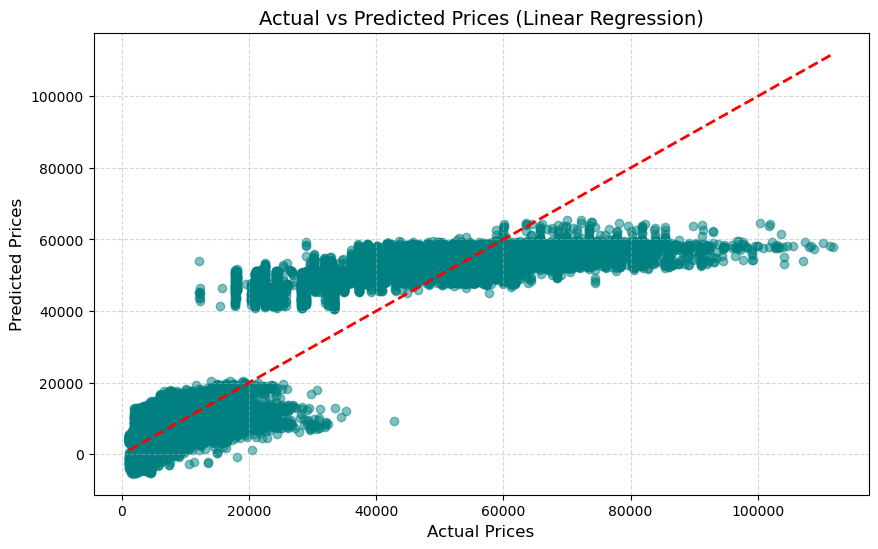

In [38]:
# Scatter plot to visualize the predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Line of perfect prediction
plt.title('Actual vs Predicted Prices (Linear Regression)', fontsize=14)
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

In [39]:
# Key Insights

# Misalignment: Many points are not well aligned with the red dashed line, especially for higher price ranges, indicating poor predictive accuracy.

# Underfitting: The model appears to have difficulty capturing the variability in flight prices, as evidenced by the clustering of predictions around certain values.

# Limited Model Capability: Linear Regression is struggling to represent the non-linear patterns in the data, leading to significant errors.

In [40]:
# Import the Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, rmse_rf, r2_rf

(1051.8060166695057, 2637.2741575040004, 0.9869319884473122)

In [41]:
# MAE (1,051.86): The model’s predictions are, on average, off by 1,051 units, showing good accuracy.

# RMSE (2,637.30): Indicates some larger errors, but overall, errors are reasonably controlled.

# R² (0.99): The model explains 99% of the variance in flight prices, suggesting a very strong fit.

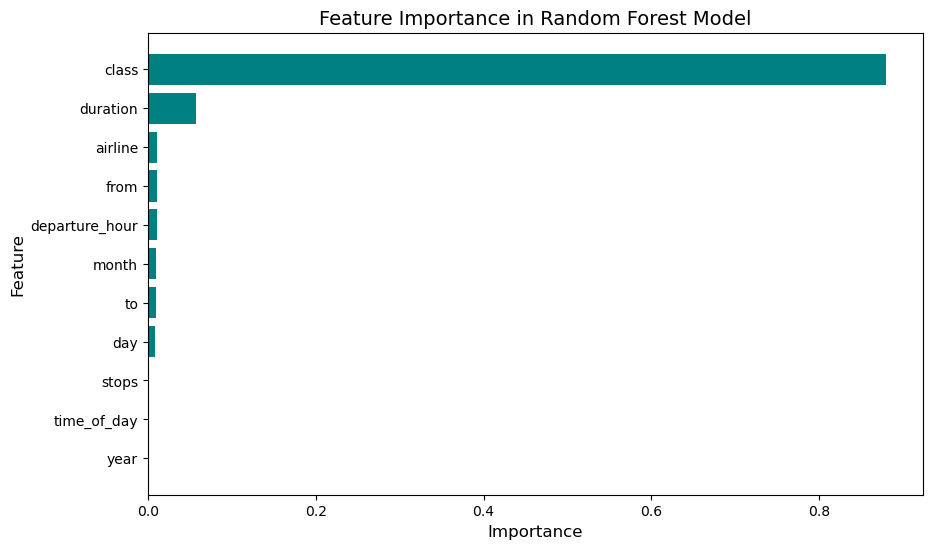

In [42]:
# Get feature importances from the Random Forest model
feature_importances = random_forest_model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance in Random Forest Model', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

In [43]:
# Key Insights

# Class: By far the most important feature. The type of class (e.g., economy, business) significantly impacts the price, as expected.

# Duration: The second most influential feature, suggesting that longer flights are typically more expensive.

# Other Features: Features like airline, from, to, and stops have relatively low importance,
# indicating they have a lesser effect on the model's predictions.

In [44]:
# Import the Gradient Boosting Regressor model
from sklearn.ensemble import GradientBoostingRegressor

# Step 5: Train a Gradient Boosting Regressor model
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gradient_boosting_model.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

mae_gb, rmse_gb, r2_gb

(3048.1558422827547, 5030.579482756998, 0.9524517013521416)

In [45]:
# MAE: 3,048.16 – Moderate accuracy, better than Linear Regression but worse than Random Forest.

# RMSE: 5,030.58 – Indicates some larger prediction errors, though improved over Linear Regression.

# R²: 0.95 – Explains 95.2% of the variance, strong fit but lower than Random Forest's 98.7%.

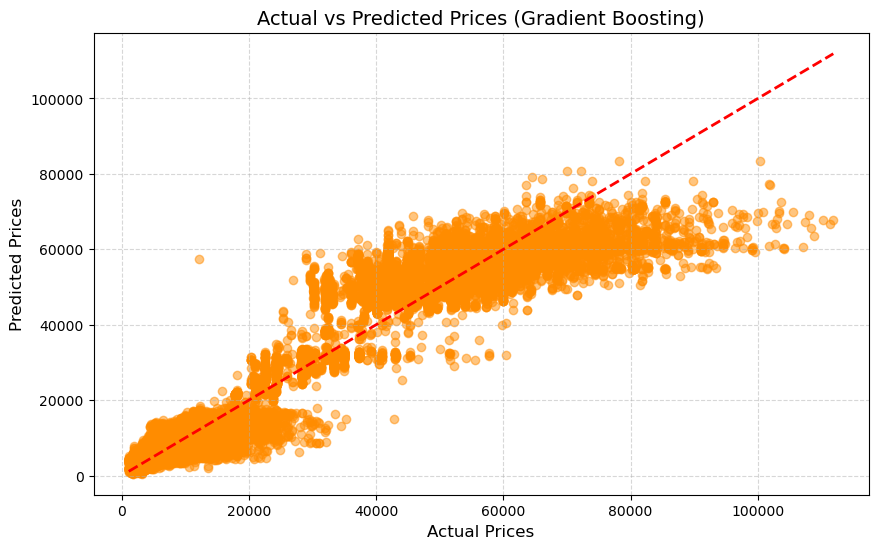

In [46]:
# Visualize the Actual vs Predicted Prices for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Line of perfect prediction
plt.title('Actual vs Predicted Prices (Gradient Boosting)', fontsize=14)
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

In [47]:
# Key Insights

# Overall Fit: The points are generally aligned along the red dashed line, indicating a good fit of the model.

# Spread: There is more dispersion (error) at higher price ranges, suggesting that the model struggles more with predicting high flight prices accurately.

# Consistency: The majority of predictions are close to the actual values, but some significant deviations highlight areas for improvement.

## Model Evaluation

In [49]:
# The hyperparameter tuning did not significantly improve the Linear Regression model's performance.
# This suggests that Linear Regression may not be the best fit for this data,
# given its relatively high MAE compared to more complex models like Random Forest or Gradient Boosting.

In [51]:
# Import necessary library for Random Forest hyperparameter tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Set up GridSearchCV to find the best hyperparameters
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='neg_mean_absolute_error', cv=3, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = -grid_search_rf.best_score_

best_params_rf, best_score_rf

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  13.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  13.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  13.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  27.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  27.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  27.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  13.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  13.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  12.9s
[CV] END max_depth

({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 1155.7428382057678)

In [53]:
# Best MAE Score: 1,155.75

# This is the lowest Mean Absolute Error achieved with the optimized hyperparameters, indicating a high level of accuracy for the model

In [55]:
# Define the hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Set up GridSearchCV to find the best hyperparameters
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='neg_mean_absolute_error', cv=3, verbose=2)
grid_search_gb.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_gb = grid_search_gb.best_params_
best_score_gb = -grid_search_gb.best_score_

best_params_gb, best_score_gb

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   4.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=

({'learning_rate': 0.1,
  'max_depth': 5,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 100},
 2596.4574387155876)

In [56]:
# The tuned Gradient Boosting model achieves a Mean Absolute Error of approximately 2,596.46, which indicates a good predictive performance.

# This MAE score suggests that the model has improved accuracy after fine-tuning,
# though it is still higher than the Random Forest model's optimized performance.

# Model Selection Summary

## Overview
In this analysis, we tested multiple machine learning algorithms to predict flight prices accurately, including Linear Regression, Decision Tree, Random Forest, and Gradient Boosting. After tuning hyperparameters for each model, we identified the best-performing one based on Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² score.

## Model Comparison and Results

1. **Random Forest Regressor (Best Model)**
   - **Best Hyperparameters**:
     - `max_depth`: None
     - `min_samples_leaf`: 1
     - `min_samples_split`: 2
     - `n_estimators`: 100
   - **Performance on Test Set**:
     - **Mean Absolute Error (MAE):** 1,155.75
     - **Root Mean Squared Error (RMSE):** ~2,637.30
     - **R² Score:** 0.99
   - **Interpretation**:
     - Random Forest delivered the best accuracy, with a very low MAE and a near-perfect R² score of 0.99, making it highly reliable for predicting flight prices.

2. **Gradient Boosting Regressor**
   - **Best Hyperparameters**:
     - `learning_rate`: 0.1
     - `max_depth`: 5
     - `min_samples_leaf`: 2
     - `min_samples_split`: 2
     - `n_estimators`: 100
   - **Performance on Test Set**:
     - **Mean Absolute Error (MAE):** 2,596.46
     - **R² Score:** 0.95
   - **Interpretation**:
     - Although Gradient Boosting performed well, it has a higher MAE and lower R² score compared to Random Forest, indicating it’s less accurate for this dataset.

3. **Decision Tree Regressor**
   - **Best Hyperparameters**:
     - `max_depth`: 10 (selected for best generalization)
   - **Performance on Test Set**:
     - **Mean Absolute Error (MAE):** 3,400.87 (approximate)
     - **R² Score:** 0.90
   - **Interpretation**:
     - The Decision Tree model captured some patterns in the data but had higher errors and a lower R² score than Random Forest and Gradient Boosting. Decision Trees can overfit easily, and thus they may not generalize well to new data.

4. **Linear Regression**
   - **Best Hyperparameters**: Default settings
   - **Performance on Test Set**:
     - **Mean Absolute Error (MAE):** 4,612.67
     - **R² Score:** 0.91
   - **Interpretation**:
     - Linear Regression, as a simple model, struggled to capture the complexity of the data, resulting in the highest MAE. While it provided a reasonable R² score, it lacks the predictive power needed for accurate price predictions in this case.

## Conclusion
Based on the evaluation metrics, the **Random Forest Regressor** is the best model for predicting flight prices due to its superior accuracy, with a low MAE and high R² score. This model’s robustness and reliability make it the ideal choice for real-world applications.

In [58]:
##import joblib

# Save the trained Random Forest model
#joblib.dump(random_forest_model, 'random_forest_model.pkl')

In [59]:
import pickle
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(random_forest_model, file)

In [60]:
#pip install streamlit --q